In [141]:
# from google.colab import drive
# drive.mount('/content/drive')

# %cd /content/drive/MyDrive/MASTERS/1st Semester/CAUSAL_INFERENCE_NEW/PROJECT/CNN_MODEL

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
event_data = pd.read_csv('processed_data/processed_events_final.csv', sep='|',nrows = 10**5)


In [6]:
event_data

,TIMESTAMP_EVENT,PRICE,PROPOSITION,USER_CLIENT_NUMBER,ARTICLE_CATEGORIE,USER_SESSION_ID,PROMOTION_LABEL,PAGE_NAME,PAGE_SECTION,PAGE_SECTION_POSITION,...,precipitation_coverage_lead_2,precipitation_amount_lead_2,temperature_lead_3,precipitation_coverage_lead_3,precipitation_amount_lead_3,temperature_lead_4,precipitation_coverage_lead_4,precipitation_amount_lead_4,total_spend_on_category_product,total_spend_on_product
0,2022-02-28T14:51:25.349Z,25.4760,554657,386730,"1,081,511,193",933,Actie,Shopping Cart,Recommended Products,2.0,...,0.0,0.0,2.9,0.0,0.0,1.8,0.00,0.000,0.00,0.00
1,2022-02-28T14:51:46.443Z,25.4760,554657,386730,"1,081,511,193",933,Actie,Shopping Cart,Recommended Products,2.0,...,0.0,0.0,2.9,0.0,0.0,1.8,0.00,0.000,0.00,0.00
2,2022-02-28T14:52:06.207Z,25.4760,554657,386730,"1,081,511,193",933,Actie,Shopping Cart,Recommended Products,2.0,...,0.0,0.0,2.9,0.0,0.0,1.8,0.00,0.000,0.00,0.00
3,2022-02-28T14:52:06.211Z,12.5268,349240,386730,"1,091,661,078",933,Actie,Shopping Cart,Recommended Products,1.0,...,0.0,0.0,2.9,0.0,0.0,1.8,0.00,0.000,0.00,0.00
4,2022-02-28T14:51:25.319Z,12.5268,349240,386730,"1,091,661,078",933,Actie,Shopping Cart,Recommended Products,1.0,...,0.0,0.0,2.9,0.0,0.0,1.8,0.00,0.000,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,2022-04-10T18:50:04.106Z,11.7612,304803,37029,"1,061,291,137",266962,NaN,NaN,NaN,NaN,...,0.0,0.0,13.2,0.0,0.0,12.1,4.17,0.117,1410.10,1410.10
99996,2022-04-10T18:50:24.770Z,29.6208,819747,37029,"1,071,301,163",266962,NaN,NaN,NaN,NaN,...,0.0,0.0,13.2,0.0,0.0,12.1,4.17,0.117,1645.00,1645.00
99997,2022-04-10T18:57:02.586Z,9.8472,516598,37029,"1,031,161,221",266962,NaN,NaN,NaN,NaN,...,0.0,0.0,13.2,0.0,0.0,12.1,4.17,0.117,44.88,44.88
99998,2022-04-10T18:50:43.919Z,23.2320,895544,37029,"1,071,331,015",266962,NaN,NaN,NaN,NaN,...,0.0,0.0,13.2,0.0,0.0,12.1,4.17,0.117,1743.54,1743.54


In [8]:
event_data = event_data.drop(columns=["TIMESTAMP_EVENT",'PAGE_SECTION','PAGE_SECTION_POSITION','DEVICE_INFO_BROWSER','TIME',"PAGE_SECTION_POSITION",
                                      'DEVICE_INFO_BRAND','DEVICE_INFO_TYPE','USER_SESSION_ID','DATE','purchases_30_day_after', 
                                      'total_spend_on_category_product','total_spend_on_product','date'])

#Due to having na values
event_data = event_data.drop(columns=["PAGE_NAME","PRODUCT_TYPE","USER_PROMOTIONS_ALLOWED"])

#Due to too many unique values
# event_data = event_data.drop(columns=["PROPOSITION",'purchases_7_day_after']) #CAN REPLACE WITH USER CLUSTER IF YOU IMPLEMENT IT
event_data = event_data.drop(columns=['purchases_7_day_after']) #CAN REPLACE WITH USER CLUSTER IF YOU IMPLEMENT IT

In [9]:
event_data.EVENT.unique()

array(['VIEW', 'ADD_TO_CARD', 'ADD_TO_PURCHASE_LIST', 'CLICK'],
      dtype=object)

In [10]:
event_data.columns

Index(['PRICE', 'PROPOSITION', 'USER_CLIENT_NUMBER', 'ARTICLE_CATEGORIE',
       'PROMOTION_LABEL', 'PROMOTION_PRICE', 'USER_SALES_GROUP',
       'USER_SEGMENT', 'USER_SALES_DISTRICT', 'EVENT', 'temperature',
       'precipcover', 'precip', 'temperature_lead_1',
       'precipitation_coverage_lead_1', 'precipitation_amount_lead_1',
       'temperature_lead_2', 'precipitation_coverage_lead_2',
       'precipitation_amount_lead_2', 'temperature_lead_3',
       'precipitation_coverage_lead_3', 'precipitation_amount_lead_3',
       'temperature_lead_4', 'precipitation_coverage_lead_4',
       'precipitation_amount_lead_4'],
      dtype='object')

In [11]:
# All the column names that include "price"or "precip" in list format case insensitive
numeric_variables = [col for col in event_data.columns if any(substring.lower() in col.lower() for substring in ["price", "precip"])]
numeric_variables

#All the collumns excpet the ones in numeric_variables and EVENT
categorical_variables = [col for col in event_data.columns if col not in numeric_variables and col != "EVENT"]
categorical_variables

['PROPOSITION',
 'USER_CLIENT_NUMBER',
 'ARTICLE_CATEGORIE',
 'PROMOTION_LABEL',
 'USER_SALES_GROUP',
 'USER_SEGMENT',
 'USER_SALES_DISTRICT',
 'temperature',
 'temperature_lead_1',
 'temperature_lead_2',
 'temperature_lead_3',
 'temperature_lead_4']

In [12]:
# Split the column into multiple columns
split_columns = event_data['ARTICLE_CATEGORIE'].str.split(',', expand=True)

#Optionally, rename the columns for better readability
split_columns.columns = ['article_part1', 'article_part2', 'article_part3', 'article_part4']

# Concatenate the new columns back to the original DataFrame if needed
event_data = pd.concat([event_data, split_columns], axis=1)

#Drop the original 'ARTICLE_CATEGORIE' column
event_data = event_data.drop('ARTICLE_CATEGORIE', axis=1)


In [13]:
# event_data["PROMOTION"] = event_data.PROMOTION_LABEL*event_data.USER_PROMOTIONS_ALLOWED
# event_data.drop(columns=["PROMOTION_LABEL","USER_PROMOTIONS_ALLOWED"], inplace=True)

In [14]:
# # Vectorized operations to create binary columns
# event_data['purchased_7_days_after_binary'] = (event_data['purchases_7_day_after'] > 0).astype(int)
# event_data['purchased_30_days_after_binary'] = (event_data['purchases_30_day_after'] > 0).astype(int)

In [15]:
event_data

,PRICE,PROPOSITION,USER_CLIENT_NUMBER,PROMOTION_LABEL,PROMOTION_PRICE,USER_SALES_GROUP,USER_SEGMENT,USER_SALES_DISTRICT,EVENT,temperature,...,temperature_lead_3,precipitation_coverage_lead_3,precipitation_amount_lead_3,temperature_lead_4,precipitation_coverage_lead_4,precipitation_amount_lead_4,article_part1,article_part2,article_part3,article_part4
0,25.4760,554657,386730,Actie,25.014,Cafetaria/Snackbar,fastservice,Hengelo,VIEW,1.5,...,2.9,0.0,0.0,1.8,0.00,0.000,1,081,511,193
1,25.4760,554657,386730,Actie,25.014,Cafetaria/Snackbar,fastservice,Hengelo,VIEW,1.5,...,2.9,0.0,0.0,1.8,0.00,0.000,1,081,511,193
2,25.4760,554657,386730,Actie,25.014,Cafetaria/Snackbar,fastservice,Hengelo,VIEW,1.5,...,2.9,0.0,0.0,1.8,0.00,0.000,1,081,511,193
3,12.5268,349240,386730,Actie,11.220,Cafetaria/Snackbar,fastservice,Hengelo,VIEW,1.5,...,2.9,0.0,0.0,1.8,0.00,0.000,1,091,661,078
4,12.5268,349240,386730,Actie,11.220,Cafetaria/Snackbar,fastservice,Hengelo,VIEW,1.5,...,2.9,0.0,0.0,1.8,0.00,0.000,1,091,661,078
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,11.7612,304803,37029,NaN,NaN,Rest. dag/avondkaart,restauratief,Hoofddorp,ADD_TO_CARD,5.0,...,13.2,0.0,0.0,12.1,4.17,0.117,1,061,291,137
99996,29.6208,819747,37029,NaN,NaN,Rest. dag/avondkaart,restauratief,Hoofddorp,ADD_TO_CARD,5.0,...,13.2,0.0,0.0,12.1,4.17,0.117,1,071,301,163
99997,9.8472,516598,37029,NaN,NaN,Rest. dag/avondkaart,restauratief,Hoofddorp,ADD_TO_CARD,5.0,...,13.2,0.0,0.0,12.1,4.17,0.117,1,031,161,221
99998,23.2320,895544,37029,NaN,NaN,Rest. dag/avondkaart,restauratief,Hoofddorp,ADD_TO_CARD,5.0,...,13.2,0.0,0.0,12.1,4.17,0.117,1,071,331,015


In [16]:
event_data['PROMOTION_PRICE'] = event_data['PROMOTION_PRICE'].fillna(event_data['PRICE'])

#Replace na values in PROMOTION_LABEL collumn with "No_Promotion"
event_data['PROMOTION_LABEL'] = event_data['PROMOTION_LABEL'].fillna("No_Promotion")

#Drop rows that has na values
event_data.dropna(inplace=True)

# All the column names that include "price"or "precip" in list format case insensitive
numeric_variables = [col for col in event_data.columns if any(substring.lower() in col.lower() for substring in ["price", "precip"])]
numeric_variables

#All the collumns excpet the ones in numeric_variables and EVENT
categorical_variables = [col for col in event_data.columns if col not in numeric_variables and col != "EVENT"]
categorical_variables

target_variable = 'EVENT'

In [17]:
# numeric_variables = ['PRICE','PROMOTION_PRICE','temperature','precipcover','precip','temperature_lead_1','precipitation_coverage_lead_1',
#                      'precipitation_amount_lead_1','temperature_lead_2','precipitation_coverage_lead_2','precipitation_amount_lead_2',
#                      'temperature_lead_3','precipitation_coverage_lead_3','precipitation_amount_lead_3','temperature_lead_4',
#                      'precipitation_coverage_lead_4','precipitation_amount_lead_4']
# categorical_variables = ['PRODUCT_TYPE','PROPOSITION','USER_CLIENT_NUMBER','PROMOTION_LABEL','PAGE_NAME','PRODUCT_TYPE','USER_SALES_GROUP''
#                          'USER_SEGMENT','USER_SALES_DISTRICT']
# target_variable = 'EVENT'

In [18]:
tiny_transformed_event_df = event_data

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

import torch
from torch import nn
from torch.utils.data import DataLoader


### Let us first take a even more tiny sample of the data to test the model

In [22]:
# All the column names that include "price"or "precip" or "temperature" in list format case insensitive
numeric_variables = [col for col in event_data.columns if any(substring.lower() in col.lower() for substring in ["price", "precip","temperature"])]
numeric_variables

#All the collumns excpet the ones in numeric_variables and EVENT
nonnumeric_variables = [col for col in event_data.columns if col not in numeric_variables]
nonnumeric_variables

#From te event_data create a dataset where it converts all nonnumeric_variables to dummies
tiny_transformed_event_df = pd.get_dummies(event_data, columns=nonnumeric_variables,dtype = int)

#From tiny_transformed_event_df select collumns names that has EVENT in it
target_variable = [col for col in tiny_transformed_event_df.columns if "EVENT" in col]
target_variable

#From tiny_transformed_event_df select nonnumeric collumns names that doesn't have EVENT or numeric_variables in it
categorical_variables = [col for col in tiny_transformed_event_df.columns if((col not in numeric_variables) & (col not in target_variable))]
categorical_variables

#Select the collumns numeric_variables + categorical_variables from the data
independent_variables = tiny_transformed_event_df[numeric_variables + categorical_variables]

#Dependent Variable
dependent_variable = tiny_transformed_event_df[target_variable]

In [24]:
len(independent_variables)

96023

In [156]:
# # Normalize the numeric variables
# scaler = StandardScaler()
# tiny_transformed_event_df[numeric_variables] = scaler.fit_transform(tiny_transformed_event_df[numeric_variables])

# #Select the collumns numeric_variables + categorical_variables from the data
# tiny_transformed_event_df[numeric_variables] = tiny_transformed_event_df[numeric_variables]

In [25]:
#Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(independent_variables, dependent_variable, test_size=0.2, random_state=42)

#Convert to tensor type
X_train = torch.tensor(X_train.to_numpy(), dtype=torch.float32)
y_train = torch.tensor(y_train.values, dtype=torch.float32)

In [26]:
'''
    Multilayer Perceptron
'''
class MLP(nn.Module):

    def __init__(self,n):
        super().__init__()
        self.layers = nn.Sequential(
            nn.Flatten(),
            nn.Linear(n, 600),
            nn.ReLU(),
            nn.Linear(600, 300),
            nn.ReLU(),
            nn.Linear(300, 100),
            nn.ReLU(),
            nn.Linear(100, 10),
            nn.ReLU(),
            nn.Linear(10, 4),   # Change the output size to 4
            nn.Sigmoid()        # Apply Sigmoid to output 4 values between 0 and 1
        )

    def forward(self, x):
        '''Forward pass'''
        return self.layers(x)

if __name__ == '__main__':

    # Check if GPU is available
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    print(f'Using device: {device}')    

    # Check if GPU is available
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    print(f'Using device: {device}')    

    # Hyperparameters
    batch_size = 64
    learning_rate = 1e-4
    epochs = 5

    # set fixed random seed
    torch.manual_seed(42)

    # #Create dataset
    train_data = torch.utils.data.TensorDataset(X_train, y_train)
    trainloader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, shuffle=True)

    # Initializing Net
    mlp = MLP(n = int(X_train.shape[1]))

    # defining loss function
    loss_function = nn.CrossEntropyLoss()
    # defining optimizer
    optimizer = torch.optim.Adam(mlp.parameters(), lr=learning_rate)


    # training loop
    for epoch in range(epochs):

        print('Epoch %s' % (epoch+1))

        current_loss = 0.0

        # iterate over the data
        for i, data in enumerate(trainloader, 0):

            # get data and ground truth
            inputs, targets = data

            # set gradients of all optimized tensors to zero
            optimizer.zero_grad()

            # forward pass of data through net
            outputs = mlp(inputs)

            # compute loss
            loss = loss_function(outputs, targets)

            # backward pass
            loss.backward()

            # optimizing parameters
            optimizer.step()

            # show stats
            current_loss += loss.item()
            # if i % 500 == 499:
            #     print('Loss after mini-batch %5d: %.3f'% (i+1, current_loss/500))
            #     current_loss = 0.0
        print('Loss of epoch %5d: %.3f'% (epoch+1, current_loss))

    # end
    print('Training finished!')

Using device: cpu
Using device: cpu
Epoch 1
Loss of epoch     1: 1216.824
Epoch 2
Loss of epoch     2: 1054.473
Epoch 3
Loss of epoch     3: 1014.236
Epoch 4
Loss of epoch     4: 1003.362
Epoch 5
Loss of epoch     5: 998.246
Training finished!


In [27]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

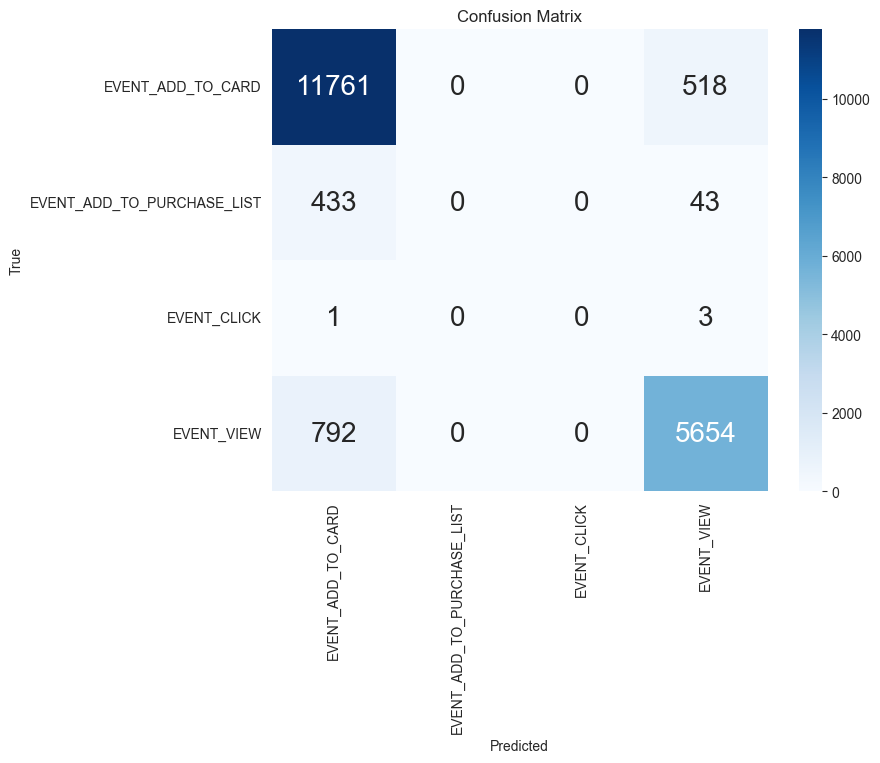

In [28]:
# Create a dataset for testing

batch_size = 64
#Convert to tensor type
#Convert to tensor type
X_test = torch.tensor(X_test.to_numpy(), dtype=torch.float32)
y_test = torch.tensor(y_test.values, dtype=torch.float32)

test_data = torch.utils.data.TensorDataset(X_test, y_test)
testloader = torch.utils.data.DataLoader(test_data, batch_size=batch_size, shuffle=False)

# Switch to evaluation mode
mlp.eval()

# Generate predictions for the entire test set
all_predicted = []
all_targets = []

with torch.no_grad():
    for data in testloader:
        inputs, targets = data
        outputs = mlp(inputs)
        _, predicted = torch.max(outputs, 1)  # Take the index of the maximum value
        all_predicted.extend(predicted.tolist())
        all_targets.extend(torch.argmax(targets, dim=1).tolist())  # Convert one-hot encoded targets to class indices

# Compute confusion matrix
conf_matrix = confusion_matrix(all_targets, all_predicted)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=conf_matrix,annot_kws={'size': 20}, fmt="d", cmap="Blues",
            xticklabels=target_variable, yticklabels=target_variable,
            vmin=0, vmax=np.max(conf_matrix))  # Adjust vmin and vmax for better visibility of values
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [29]:
# Generate classification report
report = classification_report(all_targets, all_predicted, target_names=target_variable)

# Print the classification report
print(report)

                            precision    recall  f1-score   support

         EVENT_ADD_TO_CARD       0.91      0.96      0.93     12279
EVENT_ADD_TO_PURCHASE_LIST       0.00      0.00      0.00       476
               EVENT_CLICK       0.00      0.00      0.00         4
                EVENT_VIEW       0.91      0.88      0.89      6446

                  accuracy                           0.91     19205
                 macro avg       0.45      0.46      0.46     19205
              weighted avg       0.88      0.91      0.89     19205



/Users/mehdigreefhorst/Desktop/CausalInference/venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/mehdigreefhorst/Desktop/CausalInference/venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/mehdigreefhorst/Desktop/CausalInference/venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

In [162]:
# Save the trained model
torch.save(mlp.state_dict(), 'trained_model.pth')
print('Trained model saved as "trained_model.pth"')

Trained model saved as "trained_model.pth"
